Serie temporal sistema lagunar peine

ingreso de series temporales de pozos de monitoreo de nivel en peine, mediciones por SQM 

In [1]:

import os
import pandas as pd
import pastas as ps
import matplotlib.pyplot as plt

ps.set_log_level("ERROR")
ps.show_versions()

Pastas version: 1.8.1
Python version: 3.11.8
NumPy version: 2.1.3
Pandas version: 2.2.3
SciPy version: 1.15.2
Matplotlib version: 3.10.0
Numba version: 0.61.0


aca se configura la ruta a la base de datos , para los niveles, la precipitacion y la evaporacion.

In [2]:
# --- Paso 1: Configuración inicial ---
# Ruta de la carpeta con los datos de nivel de pozos
# carpeta_pozos = os.path.r'C:\\Users\\alvar\\Desktop\\Programacion (machine learning, data science)\\modelo pastas peine\\datos\\pozos nivel peine'

# # Rutas de los archivos de estrés (precipitación y evaporación)
# archivos_precipitacion = [r'C:\\Users\\alvar\\Desktop\\Programacion (machine learning, data science)\\modelo pastas peine\\datos\\resultados_meteo\\precip\\Prec_CHAXA.csv', 
#                           r'C:\\Users\\alvar\\Desktop\\Programacion (machine learning, data science)\\modelo pastas peine\\datos\\resultados_meteo\\precip\\Prec_LZA9-1 (Interna).csv', 
#                           r'C:\\Users\\alvar\\Desktop\\Programacion (machine learning, data science)\\modelo pastas peine\\datos\\resultados_meteo\\precip\\Prec_LZA10-1.csv']
# archivos_evaporacion = [r'C:\\Users\\alvar\\Desktop\\Programacion (machine learning, data science)\\modelo pastas peine\\datos\\resultados_meteo\\evap\\Evap_CHAXA.csv', 
#                         r'C:\\Users\\alvar\\Desktop\\Programacion (machine learning, data science)\\modelo pastas peine\\datos\\resultados_meteo\\evap\\Evap_LZA9-1 (Interna).csv']


carpeta_pozos = os.path.join('datos', 'pozos nivel peine')

# Rutas de los archivos de estrés (precipitación y evaporación)
archivos_precipitacion = [os.path.join('datos', 'resultados_meteo', 'precip', 'Prec_CHAXA.csv'), 
                          os.path.join('datos', 'resultados_meteo', 'precip', 'Prec_LZA9-1 (Interna).csv'), 
                          os.path.join('datos', 'resultados_meteo', 'precip', 'Prec_LZA10-1.csv')]
archivos_evaporacion = [os.path.join('datos', 'resultados_meteo', 'evap', 'Evap_CHAXA.csv'), 
                        os.path.join('datos', 'resultados_meteo', 'evap', 'Evap_LZA9-1 (Interna).csv')]

In [7]:
reference_levels = pd.Series({
    "1024": 2300.950,
    "1028": 2301.448,
    "2037": 2301.929,
    "2018": 2301.762,
    "GD-03": 2301.051,
    "GD-04": 2300.880,
    "L10-1": 2305.996,
    "L10-2": 2301.602,
    "L10-3": 2301.877,
    "L10-4": 2301.882,
    "L10-5": 2301.747,
    "L10-6": 2301.760,
    "L10-7": 2301.976,
    "L10-8": 2301.993,
    "L10-9": 2302.035,
    "L10-10": 2302.046,
    "L10-11": 2301.782,
    "L10-12": 2301.832,
    "L10-13": 2301.961,
    "L10-14": 2302.007,
    "L10-15": 2301.859,
    "L10-16": 2301.935,
    "L10-17": 2301.901,
    "REGLILLA INTERNA CONAF": 2301.456,
    "REGLILLA SALADA CONAF": 2301.963,
    "REGLILLA SALADITA CONAF": 2301.762
})


Datos del pozo Pozo 2018:
Fecha
2007-04-09    2300.462
2007-02-10    2300.419
NaT           2300.414
2007-06-12    2300.411
NaT           2300.404
Name: Pozo 2018, dtype: float64
<class 'pandas.core.series.Series'>
DatetimeIndex: 240 entries, 2007-04-09 to NaT
Series name: Pozo 2018
Non-Null Count  Dtype  
--------------  -----  
238 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB
None

Datos del pozo Pozo 2037:
Fecha
2007-02-10    2299.663
NaT           2299.654
2007-05-12    2299.654
NaT           2299.639
2008-02-02    2299.659
Name: Pozo 2037, dtype: float64
<class 'pandas.core.series.Series'>
DatetimeIndex: 239 entries, 2007-02-10 to NaT
Series name: Pozo 2037
Non-Null Count  Dtype  
--------------  -----  
236 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB
None

Datos del pozo Pozo REGLILLA SALADITA CONAF:
Fecha
2005-01-01    2300.947
2005-01-05    2300.952
2005-01-08    2300.967
2005-01-10         NaN
2006-01-02    2300.952
Name: Pozo REGLILLA SALADITA 

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a fo

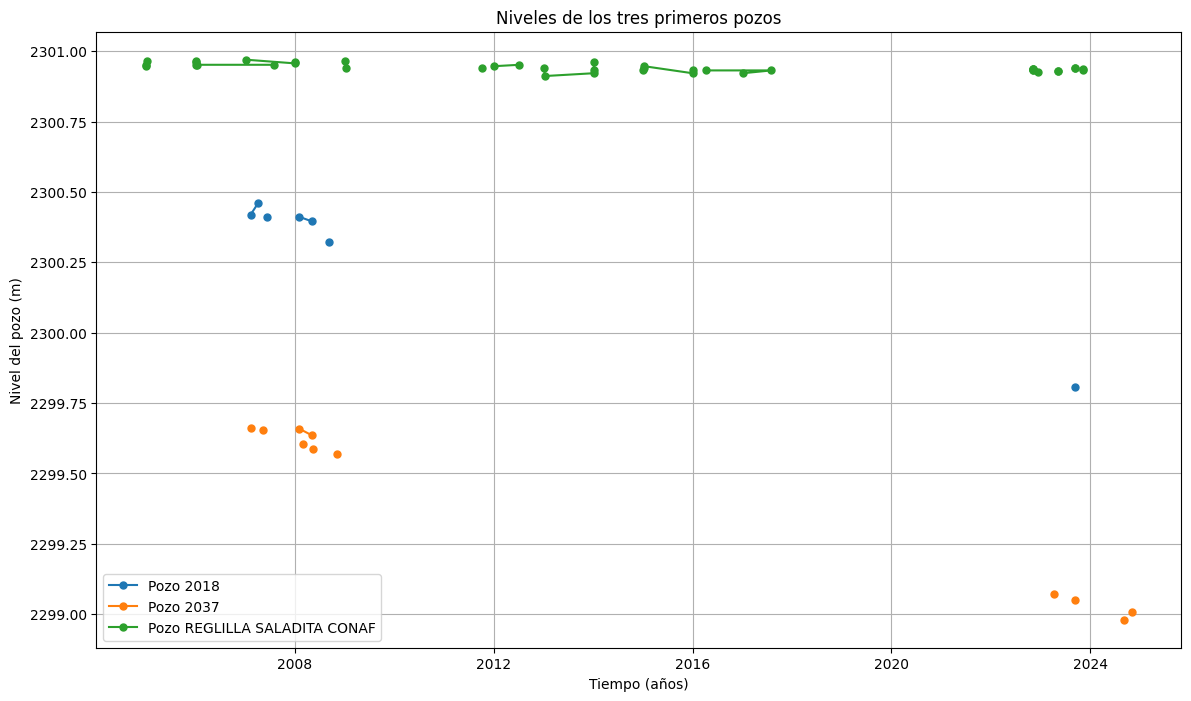

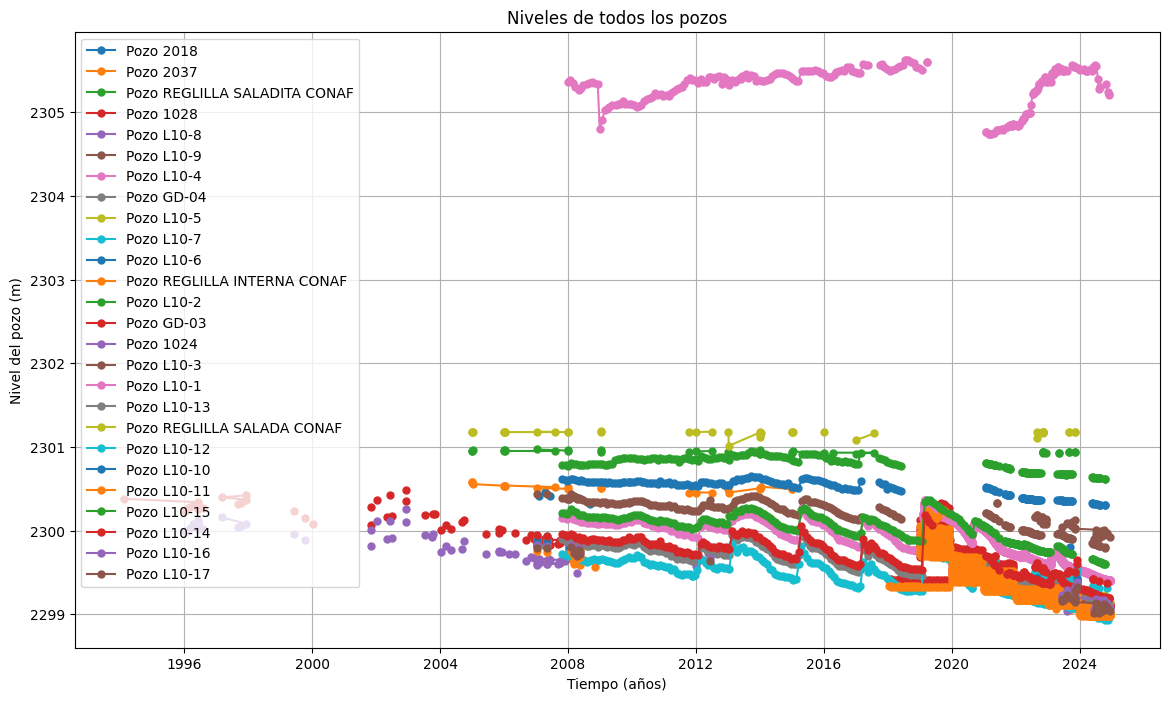

In [87]:

# Leer los datos de nivel de los pozos
datos_pozos = {}

for archivo in os.listdir(carpeta_pozos):
    if archivo.endswith(".csv"):
        nombre_pozo = archivo.split(".")[0]
        ruta_archivo = os.path.join(carpeta_pozos, archivo)
        
        # Leer el archivo CSV y convertirlo en una Series
        datos = pd.read_csv(ruta_archivo, index_col=0, parse_dates=True)
        datos.index = pd.to_datetime(datos.index, errors='coerce')  # Asegurarse de que el índice sea de tipo datetime
        datos_series = datos.squeeze("columns")  # Convertir DataFrame a Series
        datos_series = reference_levels[nombre_pozo[5:]] - datos_series # Heads
        # datos_series = datos_series - 2300 # Heads above 2300 msnm
        datos_pozos[nombre_pozo] = datos_series 

# Verificar que los datos de los pozos se han leído y convertido correctamente
for pozo, datos in datos_pozos.items():
    print(f"\nDatos del pozo {pozo}:")
    print(datos.head())
    print(datos.info())
#graficar los datos de los pozos
# Graficar los datos de los tres primeros pozos
plt.figure(figsize=(14, 8))

for i, (pozo, datos) in enumerate(datos_pozos.items()):
    if i < 3:
        plt.plot(datos.index, datos.values, label=pozo, marker='o', linestyle='-', markersize=5)

plt.xlabel('Tiempo (años)')
plt.ylabel('Nivel del pozo (m)')
plt.title('Niveles de los tres primeros pozos')
plt.legend()
plt.grid(True)
plt.show()

# Graficar los datos de todos los pozos
plt.figure(figsize=(14, 8))

for pozo, datos in datos_pozos.items():
    plt.plot(datos.index, datos.values, label=pozo, marker='o', linestyle='-', markersize=5)

plt.xlabel('Tiempo (años)')
plt.ylabel('Nivel del pozo (m)')
plt.title('Niveles de todos los pozos')
plt.legend()
plt.grid(True)
plt.show()

Datos de precipitación:
Fecha
01/01/2000    0.0
01/01/2001    0.0
01/01/2003    0.0
01/01/2004    0.0
01/01/2005    0.0
Name: Precipitación, dtype: float64

Datos de evaporación:
Fecha
01/01/2000    10.60
01/01/2001     8.20
01/01/2003    12.90
01/01/2004    12.20
01/01/2005    10.63
Name: Evaporación, dtype: float64


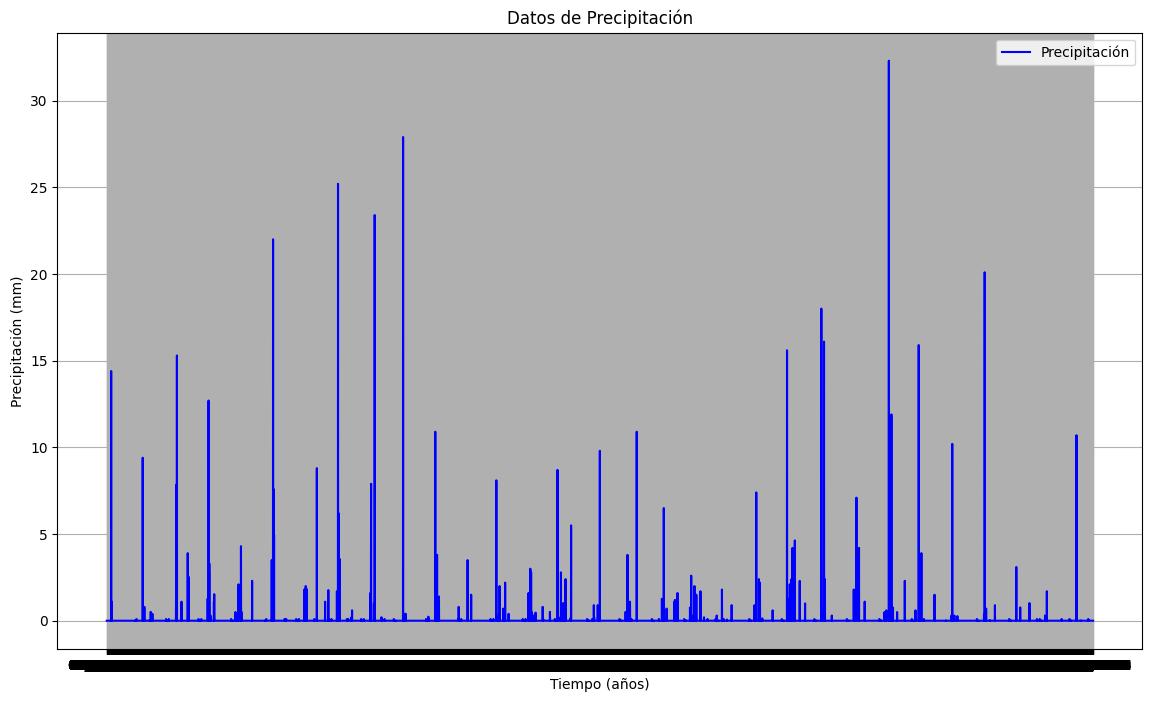

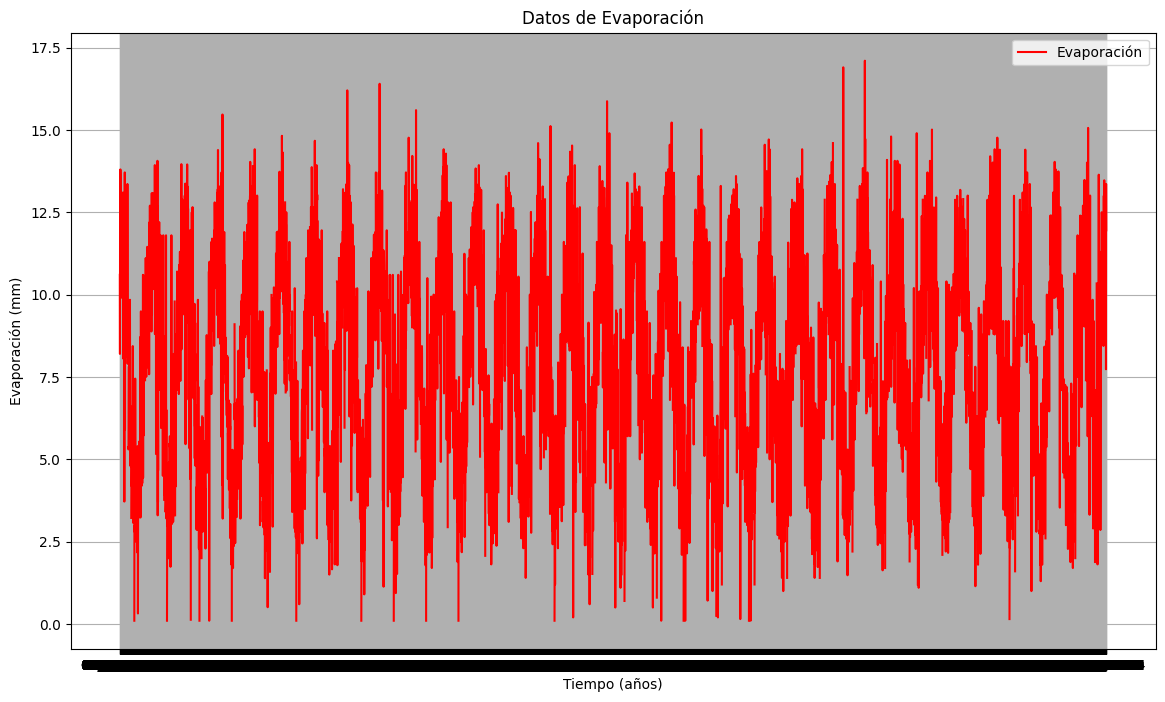

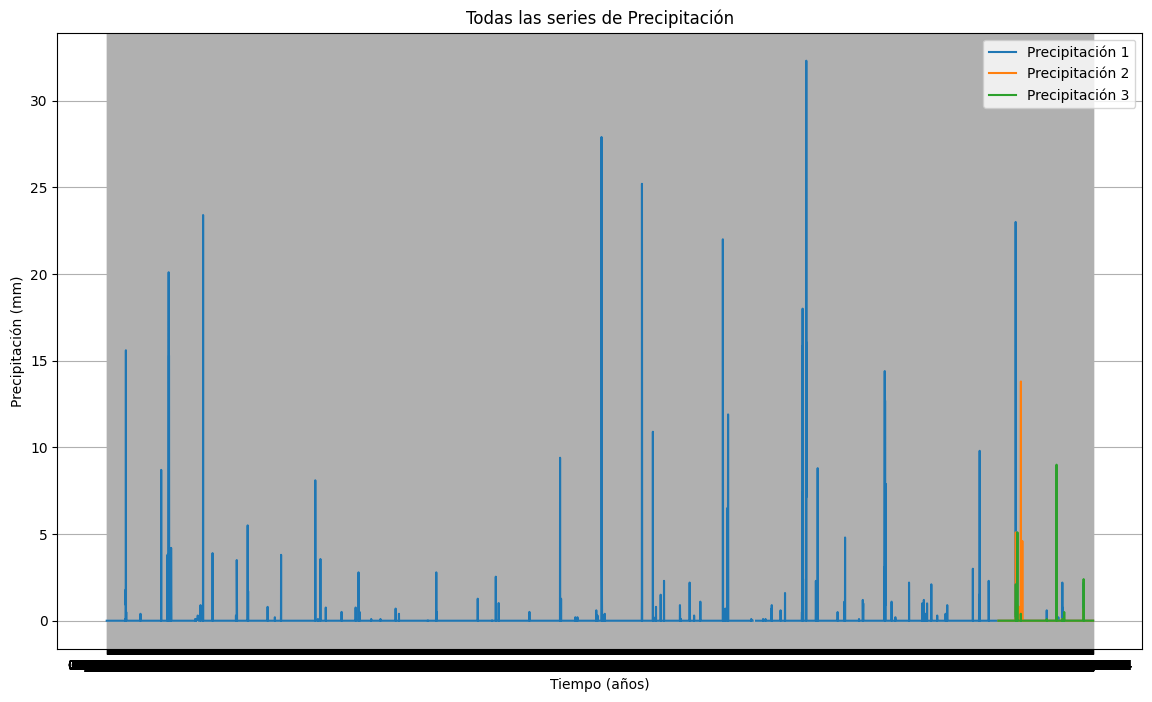

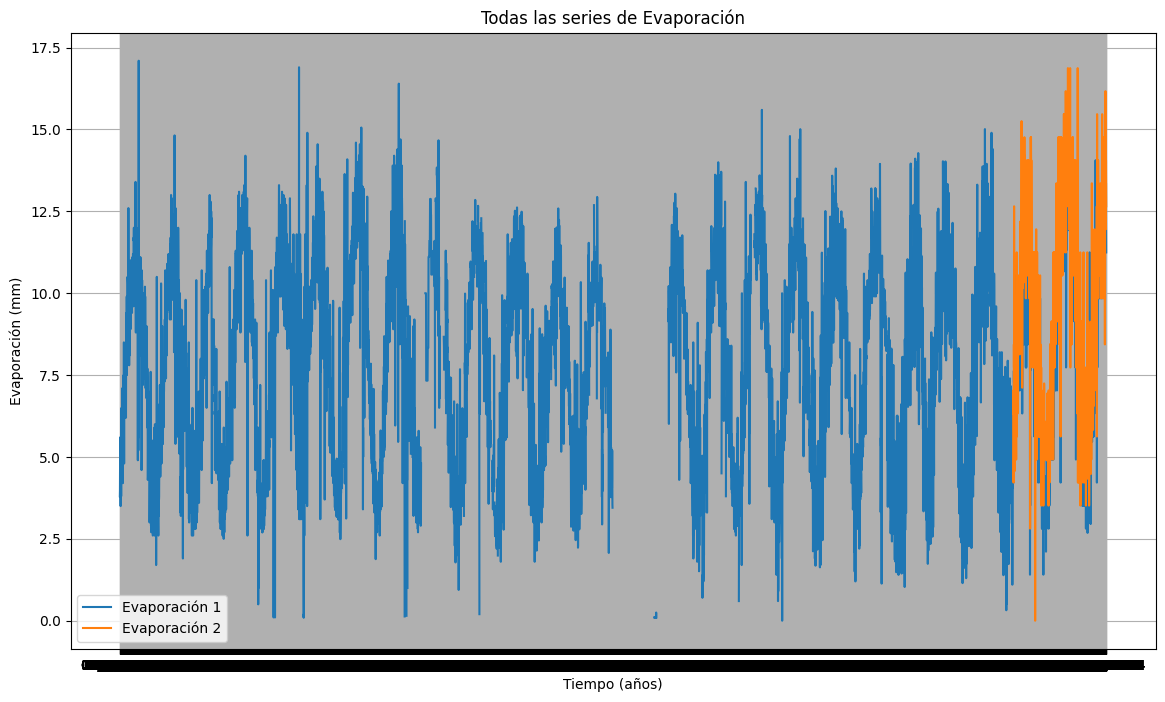

In [4]:
# --- Paso 2: Leer datos de estrés ---
# Leer y concatenar datos de precipitación
precipitacion_list = [pd.read_csv(archivo, index_col=0, parse_dates=True).squeeze("columns") for archivo in archivos_precipitacion]
precipitacion = pd.concat(precipitacion_list).groupby(level=0).mean()

# Leer y concatenar datos de evaporación
evaporacion_list = [pd.read_csv(archivo, index_col=0, parse_dates=True).squeeze("columns") for archivo in archivos_evaporacion]
evaporacion = pd.concat(evaporacion_list).groupby(level=0).mean()

# Verificar que los datos se han leído correctamente
print("Datos de precipitación:")
print(precipitacion.head())
print("\nDatos de evaporación:")
print(evaporacion.head())


# Graficar los datos de estrés (precipitación y evaporación) por separado

# Graficar datos de precipitación
plt.figure(figsize=(14, 8))
plt.plot(precipitacion.index, precipitacion.values, label='Precipitación', color='blue', linestyle='-')
plt.xlabel('Tiempo (años)')
plt.ylabel('Precipitación (mm)')
plt.title('Datos de Precipitación')
plt.legend()
plt.grid(True)
plt.show()

# Graficar datos de evaporación
plt.figure(figsize=(14, 8))
plt.plot(evaporacion.index, evaporacion.values, label='Evaporación', color='red', linestyle='-')
plt.xlabel('Tiempo (años)')
plt.ylabel('Evaporación (mm)')
plt.title('Datos de Evaporación')
plt.legend()
plt.grid(True)
plt.show()

# Graficar todas las series de precipitación juntas
plt.figure(figsize=(14, 8))
for i, serie in enumerate(precipitacion_list):
    plt.plot(serie.index, serie.values, label=f'Precipitación {i+1}', linestyle='-')
plt.xlabel('Tiempo (años)')
plt.ylabel('Precipitación (mm)')
plt.title('Todas las series de Precipitación')
plt.legend()
plt.grid(True)
plt.show()

# Graficar todas las series de evaporación juntas
plt.figure(figsize=(14, 8))
for i, serie in enumerate(evaporacion_list):
    plt.plot(serie.index, serie.values, label=f'Evaporación {i+1}', linestyle='-')
plt.xlabel('Tiempo (años)')
plt.ylabel('Evaporación (mm)')
plt.title('Todas las series de Evaporación')
plt.legend()
plt.grid(True)
plt.show()


date
2019-06-30     130.300000
2019-07-31     975.725000
2019-08-31    1071.150000
2019-09-30    1066.553000
2019-10-31    1148.341667
                 ...     
2024-08-31    1100.630000
2024-09-30    1030.950000
2024-10-31    1050.610000
2024-11-30    1030.830000
2024-12-31    1120.970000
Freq: ME, Name: Total, Length: 67, dtype: float64


'M' is deprecated and will be removed in a future version, please use 'ME' instead.'M' is deprecated and will be removed in a future version, please use 'ME' instead.'M' is deprecated and will be removed in a future version, please use 'ME' instead.

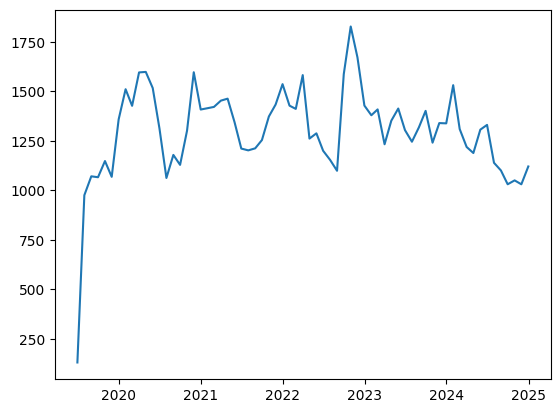

In [109]:
ALB = pd.read_csv(os.path.join("datos","pumping","ALB_pumping.csv"))
ALB["date"] = pd.to_datetime(ALB["DATE"], format="%Y-%m-%d")
ALB.set_index("date", inplace=True)

SQM = pd.read_csv(os.path.join("datos","pumping","SQM_pumping.csv"))
SQM["date"] = pd.to_datetime(SQM["Fecha final"], format="%Y-%m-%d")
SQM.set_index("date", inplace=True)

SQM_mop = pd.read_csv(os.path.join("datos","pumping","sqm","Bombeo mop","merged_output_mop.csv"))
SQM_mop["date"] = pd.to_datetime(SQM_mop["Fecha final"], format="%Y-%m-%d")
SQM_mop.set_index("date", inplace=True)


SQM_sop = pd.read_csv(os.path.join("datos","pumping","sqm","Bombeo sop","merged_output_sop.csv"))
SQM_sop["date"] = pd.to_datetime(SQM_sop["Fecha final"], format="%Y-%m-%d")
SQM_sop.set_index("date", inplace=True)


# print(SQM)


selected_column = "Grand Total"  # Change this to your desired column name
sub_df = ALB[[selected_column]]

selected_column2 = "Total"  # Change this to your desired column name
sub_df2 = SQM[[selected_column2]]

sub_df3 = SQM_mop[["Total"]]
sub_df4 = SQM_sop[["Total"]]

# for column in sub_df.columns:
#     plt.plot(ALB.index, ALB[column])
    
wel_alb = sub_df.squeeze()
wel_alb = wel_alb.asfreq('D')

wel_sqm = sub_df2.squeeze()
wel_sqm = wel_sqm.asfreq('M')

wel_sqm_mop = sub_df3.squeeze()
wel_sqm_op = wel_sqm_mop.asfreq('M')

wel_sqm_sop = sub_df4.squeeze()
wel_sqm_sop = wel_sqm_sop.asfreq('M')

print(wel_sqm)

plt.plot(wel_sqm.index,wel_sqm.values)

# for column in sub_df.columns:
#     plt.plot(wel.index, wel[column])

Fecha
1999-01-08    0.0
1999-01-09    0.0
1999-01-10    0.0
1999-01-11    0.0
1999-01-12    0.0
             ... 
2024-12-08    0.0
2024-12-09    0.0
2024-12-10    0.0
2024-12-11    0.0
2024-12-12    0.0
Freq: D, Name: Precipitación, Length: 9471, dtype: float64
Fecha
1999-01-08     3.8000
1999-01-09     6.0000
1999-01-10     9.1000
1999-01-11     8.5000
1999-01-12    11.2000
               ...   
2024-12-08     4.5470
2024-12-09     9.8430
2024-12-10    10.1945
2024-12-11    11.2490
2024-12-12    12.6550
Freq: D, Name: Evaporación, Length: 9471, dtype: float64
Fit report Pozo L10-10            Fit Statistics
nfev    227                    EVP         94.10
nobs    166                    R2           0.94
noise   False                  RMSE         0.02
tmin    2007-10-29 00:00:00    AICc     -1240.85
tmax    2024-10-21 00:00:00    BIC      -1216.88
freq    D                      Obj          0.04
warmup  3650 days 00:00:00     ___              
solver  LeastSquares           Interp.  

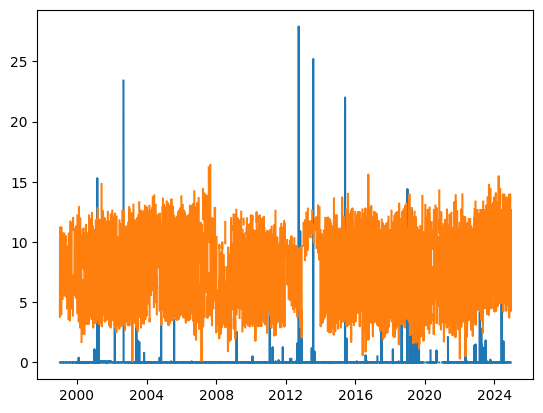

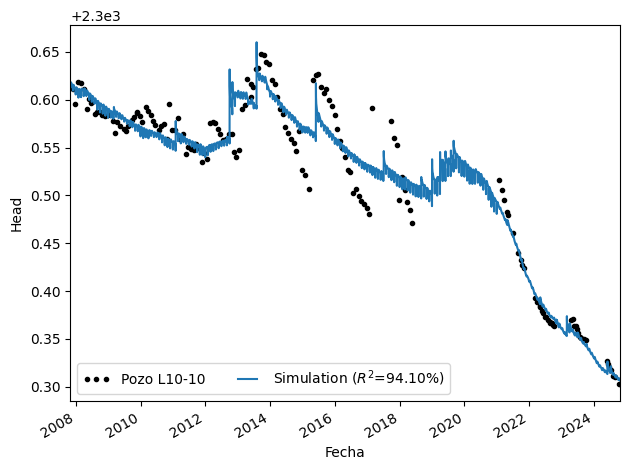

In [ ]:
# --- Paso 4: Crear modelos individuales para cada pozo ---
modelos_individuales = {}

# Asegurarse de que los índices de las series de precipitación y evaporación sean de tipo datetime
precipitacion.index = pd.to_datetime(precipitacion.index, errors='coerce')
evaporacion.index = pd.to_datetime(evaporacion.index, errors='coerce')

# Eliminar NaNs de los índices de las series de precipitación y evaporación
precipitacion = precipitacion.loc[precipitacion.index.dropna()]
evaporacion = evaporacion.loc[evaporacion.index.dropna()]

# Ordenar los índices de las series de precipitación y evaporación
precipitacion = precipitacion.sort_index()
evaporacion = evaporacion.sort_index()

# Asegurarse de que las series de precipitación y evaporación tengan una frecuencia regular
precipitacion = precipitacion.asfreq('D')
evaporacion = evaporacion.asfreq('D')
print(precipitacion)
print(evaporacion)

plt.plot(precipitacion.index, precipitacion.values)
plt.plot(evaporacion.index, evaporacion.values)
for pozo, datos in datos_pozos.items():
    if pozo == "Pozo L10-10":
        
        # Eliminar NaNs del índice de la serie
        datos = datos.loc[datos.index.dropna()]
        
        # Eliminar índices duplicados
        datos = datos.loc[~datos.index.duplicated(keep='first')]
        
        # Ordenar el índice de la serie
        datos = datos.sort_index()
        
        # Crear un modelo Pastas para el pozo actual
        ml = ps.Model(datos, name=pozo)
        #ml.add_noisemodel(ps.ArNoiseModel()) # Does not help too much
        distances = [18000,280000000]
        distances2 = [18000,28000,25000]
        # Añadir series de estrés (precipitación y evaporación)
        sm_precip = ps.StressModel(precipitacion*0.1, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        sm_alb = ps.StressModel(wel_alb / 1e6, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm = ps.StressModel(wel_sqm, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_wel = ps.WellModel([wel_alb/ 1e6, wel_sqm], "WellModel", distances)
        sm_sqm_mop = ps.StressModel(wel_sqm_mop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm_sop = ps.StressModel(wel_sqm_sop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        sm_wel2 = ps.WellModel([wel_alb/ 1e6, wel_sqm_mop, wel_sqm_sop], "WellModel", distances2)
   
        # sm_rch = ps.RechargeModel(
        #     precipitacion,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Peterson(),
        #     settings=("prec", "evap"),
        # )    
        
        sm_rch = ps.RechargeModel(
            precipitacion*0.8,
            evaporacion,
            ps.Gamma(),
            name="rainevap",
            recharge=ps.rch.Linear(),
            settings=("prec", "evap"),
        )     
        
        #sm_rch = ps.RechargeModel(precipitacion, evaporacion, ps.Exponential(), "Recharge")
        
        # ml.add_stressmodel(sm_precip)
        # ml.add_stressmodel(sm_evap)
        ml.add_stressmodel(sm_rch)
        # ml.add_stressmodel(sm_wel)
        # ml.add_stressmodel(sm_alb)
        # ml.add_stressmodel(sm_sqm)
        # ml.add_stressmodel(sm_sqm_mop)
        # ml.add_stressmodel(sm_sqm_sop)
        ml.add_stressmodel(sm_wel2)
        

        
        # Calibrar el modelo
        ml.solve()
        
        # Guardar el modelo en el diccionario
        modelos_individuales[pozo] = ml

        # Graficar los resultados del modelo individual
        ml.plot()
        # ml.plots.stacked_results(
        #         figsize=(10, 8),
        #         stacklegend=True,
        #         stackcolors={"Extraction_2": "C1",},
            
        # )
        # plt.title(f"Modelo para el {pozo}")
        # plt.show()
        


In [ ]:
# --- Paso 5: Crear un modelo conjunto para todos los pozos ---



Fecha
1994-02-11    1.067000
1996-01-07    1.081000
1996-02-06    1.071000
1996-03-09    1.041000
1996-04-10    1.001000
                ...   
2024-12-12    2.545333
2024-12-13    2.480000
2024-12-14    2.480000
2024-12-15    2.480000
NaT           1.516824
Length: 2682, dtype: float64


ValueError: Need at least 3 dates to infer frequency